In [5]:
import matplotlib.pyplot as plt
import numpy
import json
classes = ['LFM', 'LFM_triang', 'LFM_esc', '2FSK', '4FSK', '8FSK', 'Costas', '2PSK', '4PSK', '8PSK', 'Barker', 'Frank',
           'NM']
snrs = [8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
output_path = '/mnt/c/Users/mavi/repositories/AMC'
signal_accuracy_f = open(output_path+'/results/hierarchical/signal_acc.json')
signal_accuracy = json.load(signal_accuracy_f)
signal_accuracy

{'LFM': [98.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 'LFM_triang': [90.0,
  96.0,
  99.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 'LFM_esc': [84.0,
  93.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 '2FSK': [61.0,
  88.0,
  98.0,
  99.0,
  99.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  99.0,
  99.0,
  100.0,
  0.0,
  0.0],
 '4FSK': [63.0,
  82.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  99.0,
  100.0,
  99.0,
  100.0,
  100.0,
  99.0,
  98.0,
  99.0,
  0.0,
  0.0],
 '8FSK': [68.0,
  85.0,
  91.0,
  98.0,
  100.0,
  100.0,
  100.0,
  99.0,
  100.0,
  99.0,
  99.0,
  100.0,
  98.0,
  99.0,
  100.0,
  0.0,
  0.0],
 'Costas': [65.0,
  78.0,
  84.0,
  93.0,
  98.0,
  98.0,
  100.0,
  100.0,
 

In [6]:
signal_acc = dict()
for key, value in signal_accuracy.items():
    signal_acc[key] = []
    for i in range(len(snrs)):
        signal_acc[key].append(value[i])

In [63]:
hierarchical_acc = dict()
for i in classes:
    hierarchical_acc[i] = []
hierarchical_acc['LFM'] = [0.2796, 0.607, 0.7208, 0.7650, 0.8333, 0.8504, 0.9354, 0.9742, 0.9771, 0.9896]
hierarchical_acc['LFM_triang'] = [0.952, 0.865, 0.7575, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
hierarchical_acc['LFM_esc'] = [0.522, 0.746, 0.742, 0.756, 0.749, 0.741, 0.742, 0.708, 0.655, 0.659]
hierarchical_acc['2FSK'] = [0.575833333333333,0.798333333333333,0.821666666666667,0.856666666666667,0.875833333333333,0.889166666666667,0.895,0.910833333333333,0.91,0.913333333333333]
hierarchical_acc['4FSK'] = [0.567272727272727, 0.649090909090909, 0.711818181818182, 0.743636363636364,
                            0.740909090909091, 0.785454545454545, 0.77, 0.781818181818182, 0.774545454545455,
                            0.786363636363636]
hierarchical_acc['8FSK'] = [0.575, 0.796666666666667, 0.831666666666667, 0.855, 0.85, 0.873333333333333, 0.875,
                            0.851666666666667, 0.863333333333333, 0.861666666666667]
hierarchical_acc['Costas'] = [0.225384615384615, 0.5, 0.629230769230769, 0.693846153846154, 0.752307692307692,
                              0.783846153846154, 0.790769230769231, 0.806153846153846, 0.860769230769231,
                              0.874615384615385]
hierarchical_acc['2PSK'] = [0.694, 0.628, 0.548, 0.528, 0.554, 0.596, 0.576, 0.602, 0.618, 0.598]
hierarchical_acc['4PSK'] = [0.353333333333333, 0.33, 0.39, 0.423333333333333, 0.445555555555556, 0.476666666666667,
                            0.472222222222222, 0.484444444444444, 0.5, 0.505555555555556]
hierarchical_acc['8PSK'] = [0.634444444444444, 0.974444444444444, 0.995555555555556, 0.996666666666667,
                            0.997777777777778, 0.995555555555556, 0.995555555555556, 0.992222222222222, 0.99,
                            0.993333333333333]
hierarchical_acc['Barker'] = [0.08, 0.35, 0.638333333333333, 0.806666666666667, 0.834444444444444, 0.868888888888889,
                              0.875555555555556, 0.877777777777778, 0.877777777777778, 0.886111111111111]
hierarchical_acc['Frank'] = [0.018, 0.112666666666667, 0.342, 0.583333333333333, 0.694, 0.756666666666667, 0.804,
                             0.845333333333333, 0.86, 0.857333333333333]
hierarchical_acc['NM'] = [0.691428571428571, 0.907142857142857, 0.967142857142857, 0.987142857142857, 0.988571428571429,
                          0.997142857142857, 1, 0.997142857142857, 0.998571428571429, 1]


In [65]:
for key, value in hierarchical_acc.items():
    hierarchical_acc[key] = [a * 100 for a in value]


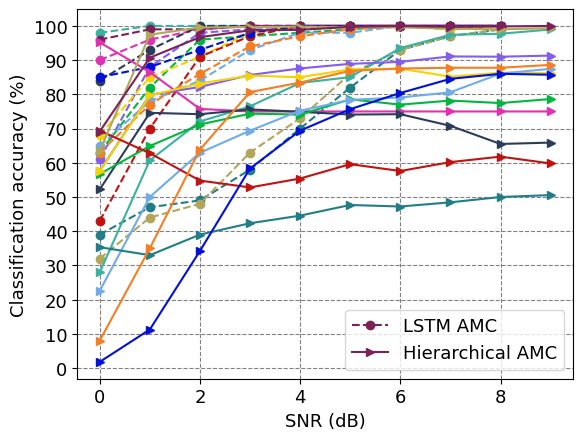

<Figure size 640x480 with 0 Axes>

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['#39b39f', '#e130b3', '#2b3d59', '#835df0', '#01b73e', '#f4d302', '#6eacea', '#c01312', '#217d87', '#b2a65b',
          '#f77d23', '#0210d8', '#7c2259']
for n, i in enumerate(classes):
    lstm, = ax.plot(signal_acc[i][:9], linestyle='--', marker='o', color=colors[n])
for n, i in enumerate(classes):
    hierarchical, = ax.plot(hierarchical_acc[i], marker='>', color=colors[n])
leg1 = ax.legend(classes, fontsize=13, loc='upper right', bbox_to_anchor=(1.4, 1.1))
# Add second legend for the maxes and mins.
# leg1 will be removed from figure
leg2 = ax.legend([lstm, hierarchical], ['LSTM AMC', 'Hierarchical AMC'], loc='lower right', fontsize=13)
ax.add_artist(leg1)
# Manually add the first legend back
ax.grid(color="grey", linewidth="0.8", linestyle="--")
plt.xticks(fontsize=13)
plt.yticks(numpy.arange(0,110,10), fontsize=13)
plt.ylabel("Classification accuracy (%)", fontsize=13)
plt.xlabel("SNR (dB)", fontsize=13)
plt.savefig(output_path+'/results/hierarchical/hierarchical_comp.png',
    bbox_inches='tight')

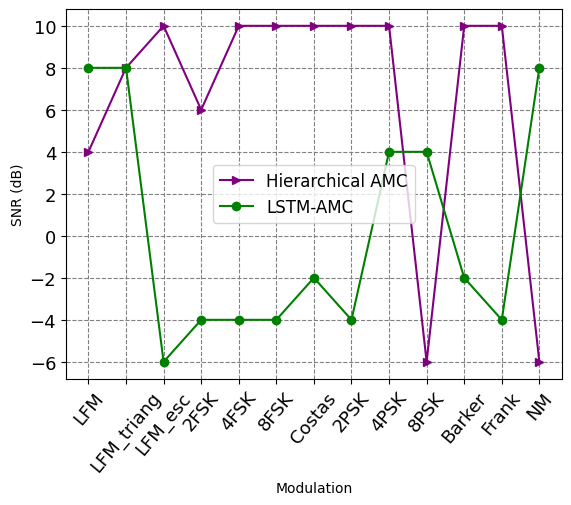

In [86]:
sensitivity_hierarchical = []
for k, val in hierarchical_acc.items():
    for i in range(len(val)):
        if val[i] >= 90:
            sensitivity_hierarchical.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity_hierarchical.append(10)
sensitivity_lstm = []
for k, val in signal_acc.items():
    for i in range(len(val)):
        if val[i] >= 90:
            sensitivity_lstm.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity_lstm.append(10)

plt.plot(classes, sensitivity_hierarchical, marker='>', color='purple')
plt.plot(classes, sensitivity_lstm, marker='o', color='green')
plt.yticks(numpy.arange(-6, 12, 2), fontsize=13)
plt.xticks(classes, rotation=50, fontsize=13)
plt.xlabel('Modulation')
plt.ylabel('SNR (dB)')
plt.grid(color="grey", linewidth="0.8", linestyle="--")
plt.legend(["Hierarchical AMC", "LSTM-AMC"], fontsize=12, loc='center')
plt.savefig(output_path + 'signal_accuracy.png', bbox_inches='tight')
#plt.show()

In [19]:
import pandas

In [60]:
lfm = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/lfm.csv", sep=';')
lfm_esc = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/cm_lfm_esc.csv", sep=';')
lfm_triang = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/cm_lfm_triang.csv", sep=';')
bfsk = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/2FSK.csv", sep=';')
qfsk = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/4FKS.csv", sep=';')
mfsk = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/8FSK.csv", sep=';')
costas = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/Costas.csv", sep=';')
bpsk = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/2PSK.csv", sep=';')
qpsk= pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/4PSK.csv", sep=';')
mpsk = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/8PSK.csv", sep=';')
barker = pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/Barker.csv", sep=';')
frank= pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/Frank.csv", sep=';')
nm= pandas.read_csv("/mnt/c/users/mavi/HierarchicalClass/informe_final/cm/NM.csv", sep=';')


In [61]:
## Confusion matrix for SNR -6 dBS
data = [lfm, lfm_esc, lfm_triang, bfsk, qfsk, mfsk, costas, bpsk, qpsk, mpsk, barker, frank, nm]
cm = []
for ddbb in data:
    print(ddbb['SNR (dB)'])
    val= list(ddbb['-6'])
    if len(val) > 5:
        cm.append(val[:5])
    else:
        cm.append(val)

0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0       LFM 
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
5       2PSK
6       4PSK
7       MPSK
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
5       2PSK
6       4PSK
7       MPSK
Name: SNR (dB), dtype: object
0        LFM
1         FM
2        PSK
3         NM
4    LFM Tri
5 

[[1458, 1, 18, 922, 0],
 [1492, 311, 128, 201, 0],
 [54, 0, 0, 0, 346],
 [19, 958, 123, 0, 0],
 [17, 714, 269, 0, 0],
 [33, 478, 87, 2, 0],
 [142, 720, 237, 301, 0],
 [0, 0, 1000, 0, 0],
 [0, 2, 898, 0, 0],
 [7, 3, 890, 0, 0],
 [2, 5, 1610, 183, 0],
 [456, 35, 960, 15, 0],
 [19, 0, 46, 635, 0]]

In [52]:
lfm_row


['1458', '1', '18', '922', '0', '0,6075']